# Trabajo Final ClusterAI 2020 - Grupo 1

### Ciencia de Datos - Ingenieria Industrial UTN BA

#### Alumnos: Tomas Ambrogi, Leandro Rocamora y Solange Suli

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

#### Es importante correr previamente la notebook "Preprocesamiento" (https://github.com/tomiambro/clusterai2020_grupo1/blob/master/Preprocesamiento.ipynb) para achicar el dataset original filtrando únicamente los casos de CABA

In [2]:
df_caba = pd.read_feather('./data/CovidCabaFeather')
df_caba.head()

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
0,0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,...,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0
1,6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
2,8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7
3,10,1000012,M,46.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-26,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-05-31,0
4,13,1000015,F,29.0,Años,Argentina,CABA,COMUNA 07,Buenos Aires,2020-05-18,...,NO,NaT,NO,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7


### Unificamos la escala de edades

Dividimos las edades en meses por 12 asi medimos todo en años

In [3]:
df_caba.loc[df_caba.edad_años_meses == 'Meses', 'edad'] = df_caba.edad / 12
df_caba.loc[df_caba.edad_años_meses == 'Meses',:].tail()
df_caba.head()

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
0,0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,...,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0
1,6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
2,8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7
3,10,1000012,M,46.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-26,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-05-31,0
4,13,1000015,F,29.0,Años,Argentina,CABA,COMUNA 07,Buenos Aires,2020-05-18,...,NO,NaT,NO,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7


Con las edades unificadas removemos la columna 'edad_años_meses' y aprovechamos para sacar tambien las columnas 'residencia_provincia_nombre', 'sepi_apertura' (semana epidemiologica), 'carga_provincia_id', 'residencia_provincia_id','residencia_departamento_id' (solo vamos a usar los datos de CABA) e 'id_evento_caso'.

In [4]:
df_caba = df_caba.drop(['index', 'edad_años_meses', 'residencia_provincia_nombre','sepi_apertura',
                       'carga_provincia_id','residencia_provincia_id','residencia_departamento_id', 'id_evento_caso'], axis=1)

df_caba.tail()

,sexo,edad,residencia_pais_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico
361128,F,27.0,Argentina,SIN ESPECIFICAR,CABA,2020-05-15,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-01
361129,M,38.0,Argentina,SIN ESPECIFICAR,Tucumán,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02
361130,F,50.0,Argentina,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,2020-05-31,NO,NaT,NO,NaT,NO,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-06-01
361131,M,42.0,Argentina,SIN ESPECIFICAR,CABA,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Privado,Caso Descartado,Descartado,2020-06-01
361132,F,30.0,Argentina,SIN ESPECIFICAR,Córdoba,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso Descartado,Descartado,2020-06-02


### Creamos columna 'argentino' y descartamos columna 'residencia_pais_nombre'
(se computa "1" si la persona es argentina o "0" si es extranjero (ej: Venezolano, Boliviano, etc)) 

In [5]:
df_caba = pd.get_dummies(data=df_caba, columns=['residencia_pais_nombre'])
df_caba.drop(['residencia_pais_nombre_Paraguay', 'residencia_pais_nombre_Bolivia', 'residencia_pais_nombre_SIN ESPECIFICAR', 'residencia_pais_nombre_Venezuela'], axis=1, inplace=True)

df_caba = df_caba.rename(columns={'residencia_pais_nombre_Argentina':'argentino'})
df_caba.head()

,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino
0,M,53.0,SIN ESPECIFICAR,Buenos Aires,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Privado,Caso Descartado,Descartado,2020-06-09,1
1,F,69.0,SIN ESPECIFICAR,CABA,2020-05-31,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Privado,Caso Descartado,Descartado,2020-06-01,1
2,M,7.0,COMUNA 07,CABA,NaT,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-06-01,1
3,M,46.0,SIN ESPECIFICAR,CABA,2020-05-26,2020-06-01,2020-05-31,NO,NaT,NO,NaT,NO,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-05-31,1
4,F,29.0,COMUNA 07,Buenos Aires,2020-05-18,2020-06-01,NaT,NO,NaT,NO,NaT,NO,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-06-01,1


### Modificamos las columnas de 'fellecido', 'cuidado_intensivo' y 'asistencia_respiratoria' con strings 'SI'/'NO' por variables booleanas.

### Ademas hacemos get_dummies de 'origen_financiamiento' (en privado/publico)

In [6]:
df_caba.fallecido = pd.Categorical(df_caba.fallecido)
df_caba.fallecido = df_caba.fallecido.cat.codes

df_caba.cuidado_intensivo = pd.Categorical(df_caba.cuidado_intensivo)
df_caba.cuidado_intensivo = df_caba.cuidado_intensivo.cat.codes

df_caba.asistencia_respiratoria_mecanica = pd.Categorical(df_caba.asistencia_respiratoria_mecanica)
df_caba.asistencia_respiratoria_mecanica = df_caba.asistencia_respiratoria_mecanica.cat.codes

df_caba = pd.get_dummies(data=df_caba, columns=['origen_financiamiento'])
df_caba = df_caba.rename(columns={'origen_financiamiento_Privado':'privado', 'origen_financiamiento_Público':'publico'})

### Ordenamos los datos de acuerdo a la fecha de apertura


In [7]:
df_caba = df_caba.sort_values(by='fecha_apertura')
df_caba.reset_index(inplace=True,drop=True)
df_caba.tail()

,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino,privado,publico
361128,M,60.0,SIN ESPECIFICAR,CABA,2020-09-19,2020-09-30,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01,1,1,0
361129,M,45.0,SIN ESPECIFICAR,CABA,2020-09-26,2020-09-30,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01,1,1,0
361130,F,55.0,COMUNA 04,CABA,NaT,2020-09-30,2020-09-30,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-09-30,1,0,1
361131,M,15.0,SIN ESPECIFICAR,CABA,NaT,2020-09-30,NaT,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-09-30,1,1,0
361132,F,21.0,COMUNA 01,CABA,NaT,2020-09-30,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-09-30,1,0,1


### Chequeamos valores nulos por columna

In [8]:
df_caba.isnull().sum()

sexo                                     0
edad                                   256
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas               189734
fecha_apertura                           0
fecha_internacion                   317362
cuidado_intensivo                        0
fecha_cui_intensivo                 356249
fallecido                                0
fecha_fallecimiento                 355767
asistencia_respiratoria_mecanica         0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                    34788
argentino                                0
privado                                  0
publico                                  0
dtype: int64

### Transformamos 'fecha_inicio_sintomas' y 'fecha_internacion' en variables booleanas --> en nuevas columnas: 'presenta_sintomas' y 'requiere_internacion'


In [9]:
df_caba['presenta_sintomas'] = df_caba['fecha_inicio_sintomas'].notnull()
df_caba['requiere_internacion'] = df_caba['fecha_internacion'].notnull()
df_caba

,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino,privado,publico,presenta_sintomas,requiere_internacion
0,F,41.0,COMUNA 12,CABA,2020-01-23,2020-01-31,NaT,0,NaT,0,NaT,0,Caso Invalidado Epidemiologicamente,Descartado,NaT,1,0,1,True,False
1,F,34.0,SIN ESPECIFICAR,CABA,2020-01-16,2020-01-31,NaT,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-02-11,1,1,0,True,False
2,F,31.0,SIN ESPECIFICAR,CABA,NaT,2020-01-31,NaT,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-02-11,1,1,0,False,False
3,M,29.0,COMUNA 11,CABA,2020-02-03,2020-02-05,NaT,0,NaT,0,NaT,0,Otro diagnostico,Descartado,NaT,1,0,1,True,False
4,F,32.0,SIN ESPECIFICAR,CABA,NaT,2020-02-26,NaT,0,NaT,0,NaT,0,Caso Invalidado Epidemiologicamente,Descartado,NaT,1,1,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361128,M,60.0,SIN ESPECIFICAR,CABA,2020-09-19,2020-09-30,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01,1,1,0,True,False
361129,M,45.0,SIN ESPECIFICAR,CABA,2020-09-26,2020-09-30,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-10-01,1,1,0,True,False
361130,F,55.0,COMUNA 04,CABA,NaT,2020-09-30,2020-09-30,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-09-30,1,0,1,False,True
361131,M,15.0,SIN ESPECIFICAR,CABA,NaT,2020-09-30,NaT,0,NaT,0,NaT,0,Caso Descartado,Descartado,2020-09-30,1,1,0,False,False


### Creamos un df unicamente con casos CONFIRMADOS de CABA

In [10]:
df_confirmados = pd.DataFrame(df_caba.loc[df_caba.clasificacion_resumen == 'Confirmado'])
df_confirmados.reset_index(inplace=True,drop=True)
df_confirmados.head() #notar que el primer caso confirmado fue el 02-03-2020

,sexo,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino,privado,publico,presenta_sintomas,requiere_internacion
0,M,43.0,COMUNA 01,CABA,2020-02-28,2020-03-02,2020-03-01,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-03,1,1,0,True,True
1,M,24.0,COMUNA 13,CABA,2020-03-01,2020-03-05,2020-03-03,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-11,1,1,0,True,True
2,M,47.0,COMUNA 03,CABA,2020-03-03,2020-03-05,2020-03-03,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,1,1,0,True,True
3,F,72.0,COMUNA 07,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-06,1,0,1,True,False
4,M,45.0,COMUNA 05,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,0,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,1,1,0,True,False


In [11]:
#vemos las dimensiones de nuestro dataset
df_confirmados.shape 

(127054, 20)

## Evaluamos datos faltantes por columnas de Datos Confirmados


In [12]:
df_confirmados.isnull().sum()

sexo                                     0
edad                                    37
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas                47648
fecha_apertura                           0
fecha_internacion                   107319
cuidado_intensivo                        0
fecha_cui_intensivo                 124735
fallecido                                0
fecha_fallecimiento                 122894
asistencia_respiratoria_mecanica         0
clasificacion                            0
clasificacion_resumen                    0
fecha_diagnostico                      635
argentino                                0
privado                                  0
publico                                  0
presenta_sintomas                        0
requiere_internacion                     0
dtype: int64


## ¿Qué hacemos con los datos faltantes?

#### - edad --> se descartan esos datos particulares (son muy pocos en comparacion a la cantidad de datos totales (127054) )

#### - "fecha_inicio_sintomas", "fecha_internacion" -->No se utilizarán las features con fechas, las mismas fueron transformamoes en variables booleanas ('presenta_sintomas' y 'requiere_internacion'). 

#### - "fecha_cuidado_intensivo", "fecha_fallecimiento" --> No se utilizarán las features con fechas, nos quedamos con 'cuidado_intensivo' y 'fallecido'

#### - "fecha_diagnostico" --> No se utilizará para el estudio


In [13]:
# Eliminamos datos faltantes de 'edad'
df_confirmados = df_confirmados.drop(df_confirmados.loc[df_confirmados.edad.isnull(),:].index)

### Transformamos la feature 'sexo' en 'sexo_F' y 'sexo_M' con get_dummies

In [14]:
df_confirmados = df_confirmados.drop(df_confirmados.loc[df_confirmados.sexo == 'NR',:].index)
df_confirmados = pd.get_dummies(data=df_confirmados, columns=['sexo'])
df_confirmados.head()

,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,...,clasificacion,clasificacion_resumen,fecha_diagnostico,argentino,privado,publico,presenta_sintomas,requiere_internacion,sexo_F,sexo_M
0,43.0,COMUNA 01,CABA,2020-02-28,2020-03-02,2020-03-01,0,NaT,0,NaT,...,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-03,1,1,0,True,True,0,1
1,24.0,COMUNA 13,CABA,2020-03-01,2020-03-05,2020-03-03,0,NaT,0,NaT,...,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-11,1,1,0,True,True,0,1
2,47.0,COMUNA 03,CABA,2020-03-03,2020-03-05,2020-03-03,0,NaT,0,NaT,...,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,1,1,0,True,True,0,1
3,72.0,COMUNA 07,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,...,Caso confirmado por laboratorio - No Activo po...,Confirmado,2020-03-06,1,0,1,True,False,1,0
4,45.0,COMUNA 05,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,...,Caso confirmado por laboratorio - No activo (p...,Confirmado,2020-03-06,1,1,0,True,False,0,1


## Analizamos si la muerte se produce _por_ covid o _con_ covid

Para eso, nos fijamos si existen registros de personas fallecidas que nunca presentaron sintomas

In [15]:
df_confirmados = df_confirmados.drop(df_confirmados.loc[(df_confirmados['fallecido'] == True) & (df_confirmados['presenta_sintomas'] == False), :].index)

In [16]:
df_confirmados['confirmado'] = 1

### Agregamos features que indiquen si la persona es mayor a 65 años y si es mayor de 65 años y se interno

In [17]:
mayor_65 = np.where(df_confirmados.edad >= 65, 1, 0)
df_confirmados['mayor_65'] = mayor_65

df_confirmados.loc[(df_confirmados.edad >= 65) & (df_confirmados.requiere_internacion == 1), 'mayor_65_internacion'] = 1
df_confirmados.mayor_65_internacion = df_confirmados.mayor_65_internacion.fillna(0)
df_confirmados

,edad,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,...,argentino,privado,publico,presenta_sintomas,requiere_internacion,sexo_F,sexo_M,confirmado,mayor_65,mayor_65_internacion
0,43.0,COMUNA 01,CABA,2020-02-28,2020-03-02,2020-03-01,0,NaT,0,NaT,...,1,1,0,True,True,0,1,1,0,0.0
1,24.0,COMUNA 13,CABA,2020-03-01,2020-03-05,2020-03-03,0,NaT,0,NaT,...,1,1,0,True,True,0,1,1,0,0.0
2,47.0,COMUNA 03,CABA,2020-03-03,2020-03-05,2020-03-03,0,NaT,0,NaT,...,1,1,0,True,True,0,1,1,0,0.0
3,72.0,COMUNA 07,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,...,1,0,1,True,False,1,0,1,1,0.0
4,45.0,COMUNA 05,CABA,2020-03-04,2020-03-05,NaT,0,NaT,0,NaT,...,1,1,0,True,False,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127049,41.0,SIN ESPECIFICAR,CABA,NaT,2020-09-30,NaT,0,NaT,0,NaT,...,1,1,0,False,False,1,0,1,0,0.0
127050,78.0,SIN ESPECIFICAR,CABA,2020-09-24,2020-09-30,NaT,0,NaT,0,NaT,...,1,1,0,True,False,1,0,1,1,0.0
127051,60.0,SIN ESPECIFICAR,CABA,2020-09-19,2020-09-30,NaT,0,NaT,0,NaT,...,1,1,0,True,False,0,1,1,0,0.0
127052,45.0,SIN ESPECIFICAR,CABA,2020-09-26,2020-09-30,NaT,0,NaT,0,NaT,...,1,1,0,True,False,0,1,1,0,0.0


### Analizamos casos confirmados acumulados diarios

Creamos tabla pivot con las features: 'confirmado','fallecido', 'asistencia_respiratoria_mecanica', 'requiere_internacion', 'presenta_sintomas', 'cuidado_intensivo','edad', 'publico', 'privado','sexo_F','sexo_M', 'argentino','mayor_65', 'mayor_65_internacion' y sumamos en funcion de la fecha de apertura

In [18]:
pivot = pd.pivot_table(df_confirmados, values = ['confirmado','fallecido', 'asistencia_respiratoria_mecanica', 'requiere_internacion', 'presenta_sintomas', 'cuidado_intensivo','edad', 'publico', 'privado','sexo_F','sexo_M', 'argentino','mayor_65', 'mayor_65_internacion'], index = 'fecha_apertura', fill_value=0, aggfunc = np.sum)
pivot.edad = pivot.edad / pivot.confirmado
pivot.tail()

,argentino,asistencia_respiratoria_mecanica,confirmado,cuidado_intensivo,edad,fallecido,mayor_65,mayor_65_internacion,presenta_sintomas,privado,publico,requiere_internacion,sexo_F,sexo_M
fecha_apertura,,,,,,,,,,,,,,
2020-09-26,676,7,692,9,44.251445,10,121,29,359,393,299,53,348,344
2020-09-27,556,2,567,6,40.890212,7,76,21,335,307,260,45,274,293
2020-09-28,764,3,785,6,41.391614,9,113,26,431,480,305,53,399,386
2020-09-29,891,4,904,4,42.636799,7,135,25,454,531,373,57,449,455
2020-09-30,829,3,852,9,42.082355,11,133,28,452,512,340,58,425,427


Completamos los dias en los que no hubo ningun confirmado

In [19]:
df_pivot = pivot.reindex(pd.DatetimeIndex(pd.date_range('03-01-2020', '09-30-2020')), fill_value=0)

# Renombro algunas columnas
df_pivot = df_pivot.rename(columns={'asistencia_respiratoria_mecanica':'asistencia_respiratoria',
                                    'fallecido':'fallecidos','confirmado':'confirmados',
                                    'presenta_sintomas':'presentan_sintomas', 'requiere_internacion':'internacion'})

## Graficamos


<Figure size 432x288 with 0 Axes>

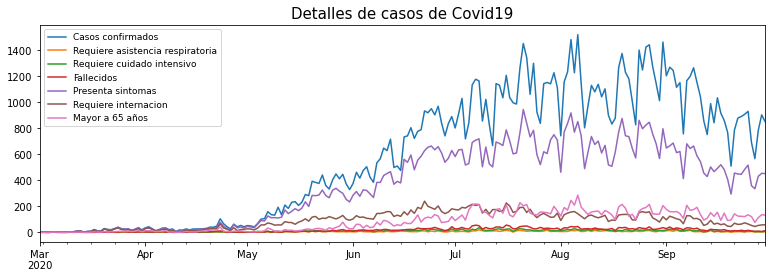

In [79]:
fig = plt.figure()

df_pivot.plot(use_index=True,y=['confirmados','asistencia_respiratoria','cuidado_intensivo','fallecidos','presentan_sintomas','internacion','mayor_65'],
              figsize=(13,4))

plt.title('Detalles de casos de Covid19', size = 15)

plt.legend(['Casos confirmados','Requiere asistencia respiratoria','Requiere cuidado intensivo','Fallecidos',
            'Presenta sintomas','Requiere internacion','Mayor a 65 años'], fontsize=9)


plt.savefig("confirmados_covid.jpg",dpi=200)
plt.show()

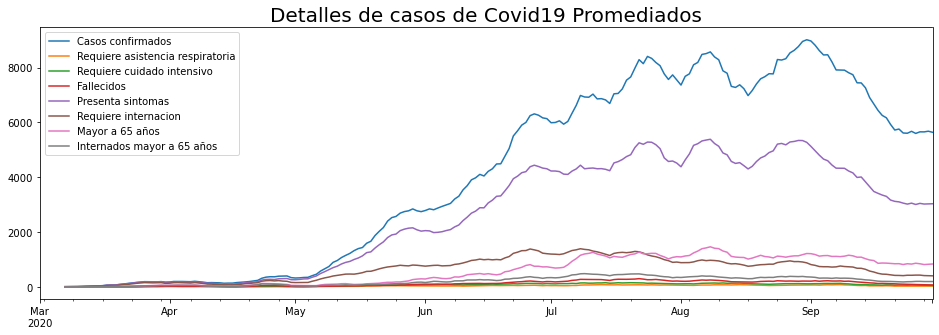

In [21]:
aux_df = df_pivot.rolling(7).sum()
aux_df.plot(use_index=True,y=['confirmados','asistencia_respiratoria','cuidado_intensivo','fallecidos','presentan_sintomas','internacion','mayor_65', 'mayor_65_internacion'],
              figsize=(16,5))

plt.title('Detalles de casos de Covid19 Promediados', size = 15)

plt.legend(['Casos confirmados','Requiere asistencia respiratoria','Requiere cuidado intensivo','Fallecidos',
            'Presenta sintomas','Requiere internacion','Mayor a 65 años','Internados mayor a 65 años'])


plt.show()

## Analizamos la correlación entre las variables

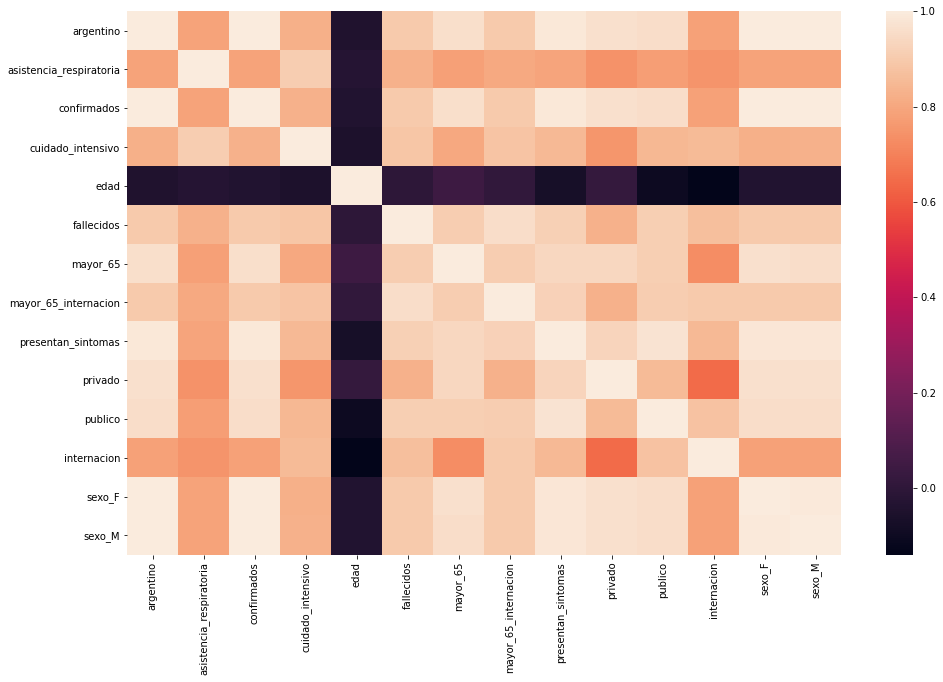

In [86]:
plt.figure(figsize=(16,10))
sns.heatmap(df_pivot.corr())

# plt.savefig("corr_heatmap.jpg",dpi=350)
plt.show()

Se puede observar que la cantidad de fallecidos presenta correlaciones altas con todas las variables. Si bien la menor correlacion se da con asistencia respiratoria mecanica, los valores de correlacion siguen siendo altos. 
Tener en cuanta que puede que exista un desfasaje temporal, pero hace falta mas analisis para poder confirmarlo.

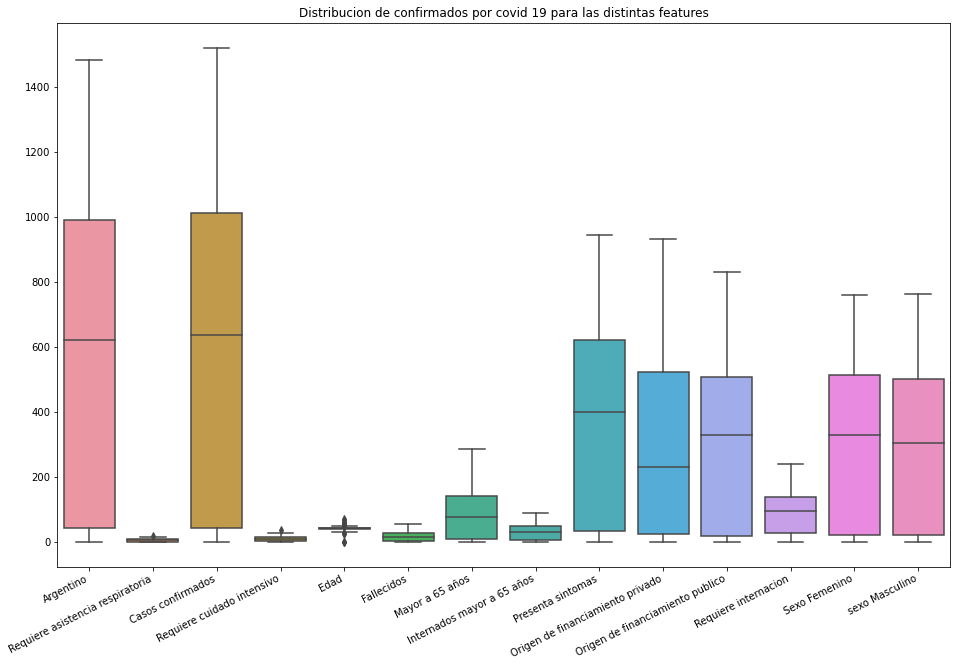

In [101]:
labels=['Argentino','Requiere asistencia respiratoria','Casos confirmados','Requiere cuidado intensivo','Edad','Fallecidos',
             'Mayor a 65 años','Internados mayor a 65 años','Presenta sintomas','Origen de financiamiento privado',
             'Origen de financiamiento publico','Requiere internacion','Sexo Femenino','sexo Masculino']

plt.figure(figsize=(16,10))
plot=sns.boxplot(data=df_pivot)

plot.set_xticklabels(labels, rotation=27, ha="right", fontsize=10)

plt.title("Distribucion de confirmados por covid 19 para las distintas features")

plt.savefig('dist_covid.jpg',dpi=200)


plt.show()

## Guardamos el Dataset

In [ ]:
df = df_pivot.reset_index()
df.to_feather('./data/pivot_data')

Levantarlo corriendo:

In [ ]:
df = pd.read_feather('./data/pivot_data')

df.index = df['index']
df.drop('index', axis=1, inplace=True)

df.tail()